# Customer Shopping Behavior Analysis  
### Demographic Insights • Spending Patterns • Category Performance • Segmentation


## Executive Summary

This project analyzes customer shopping behavior from a structured consumer dataset with demographics, purchasing patterns, product categories, and subscription behaviors.

The goal is to extract insights into:
- Customer spending patterns  
- High-value customer groups  
- Category performance  
- Discount vs non-discount behavior  
- Subscription impact on revenue  
- Product & location preferences  

The analysis concludes with actionable recommendations for business teams.


### 1. Import Libraries & Load Data

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("customer_shopping_behavior.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### 2. Data Cleaning

In [92]:
df.info()
df.isnull().sum()

# Drop duplicates
df.drop_duplicates(inplace=True)

# Clean column names (optional)
df.columns = [col.strip().replace(" ", "_") for col in df.columns]
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [93]:
# Checking Columns
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Item_Purchased', 'Category',
       'Purchase_Amount_(USD)', 'Location', 'Size', 'Color', 'Season',
       'Review_Rating', 'Subscription_Status', 'Shipping_Type',
       'Discount_Applied', 'Promo_Code_Used', 'Previous_Purchases',
       'Payment_Method', 'Frequency_of_Purchases'],
      dtype='object')

### 3. Key KPIs - Purchase KPIs

In [94]:
total_revenue = df['Purchase_Amount_(USD)'].sum()
avg_purchase = df['Purchase_Amount_(USD)'].mean()
unique_customers = df['Customer_ID'].nunique()

print("Total Revenue: $", total_revenue)
print("Average Purchase Value: $", avg_purchase)
print("Unique Customers:", unique_customers)

Total Revenue: $ 233081
Average Purchase Value: $ 59.76435897435898
Unique Customers: 3900


### 4. Customer Demographics Analysis

4.1 Age Distribution

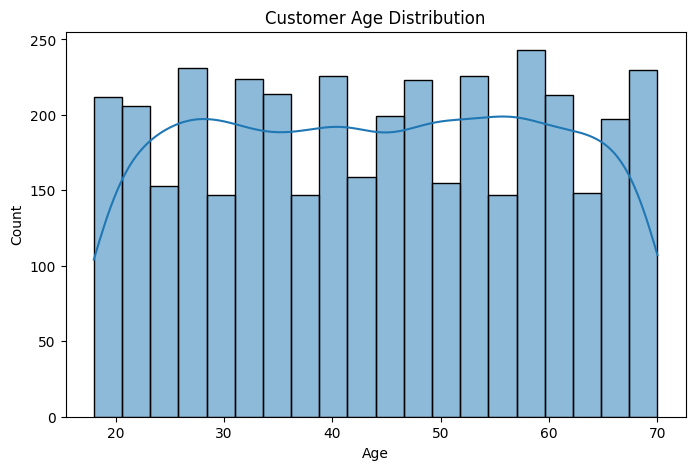

In [95]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Customer Age Distribution")
plt.show()

4.2 Gender Spending

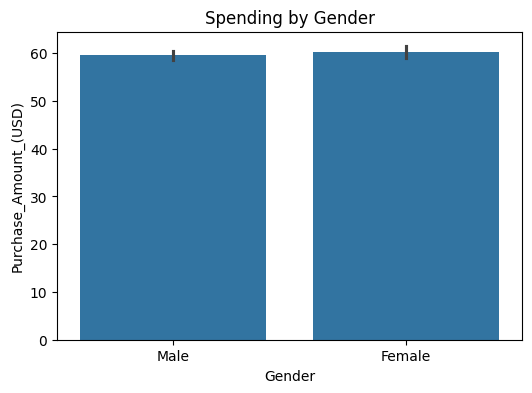

In [96]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Gender', y='Purchase_Amount_(USD)')
plt.title("Spending by Gender")
plt.show()

### 5. Category Performance

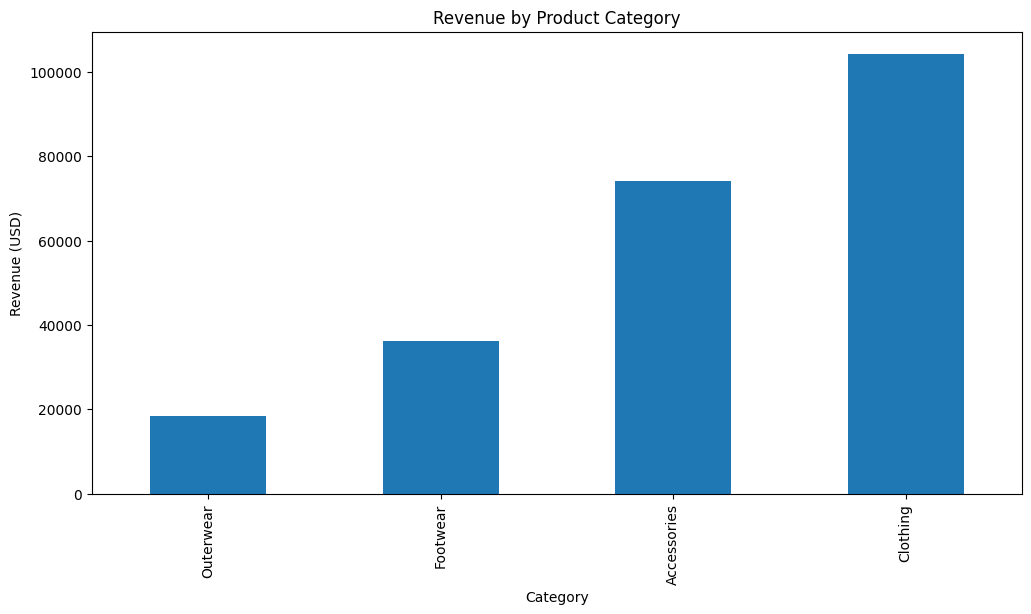

In [97]:
plt.figure(figsize=(12,6))
df.groupby("Category")["Purchase_Amount_(USD)"].sum().sort_values().plot(kind="bar")
plt.title("Revenue by Product Category")
plt.ylabel("Revenue (USD)")
plt.show()

### 6. Subscription vs Non-Subscription Customers

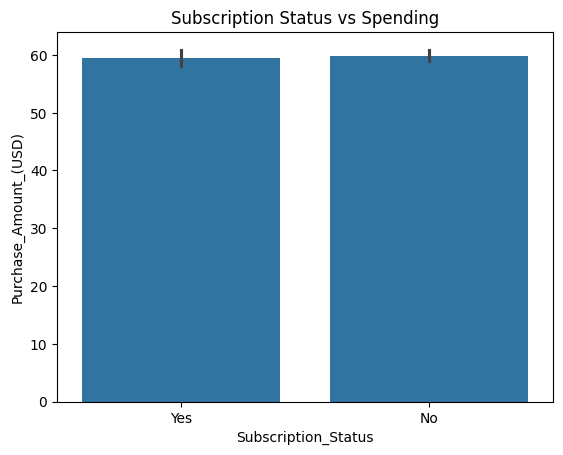

In [98]:
sns.barplot(data=df, x="Subscription_Status", y="Purchase_Amount_(USD)")
plt.title("Subscription Status vs Spending")
plt.show()

### 7. Discount Impact Analysis

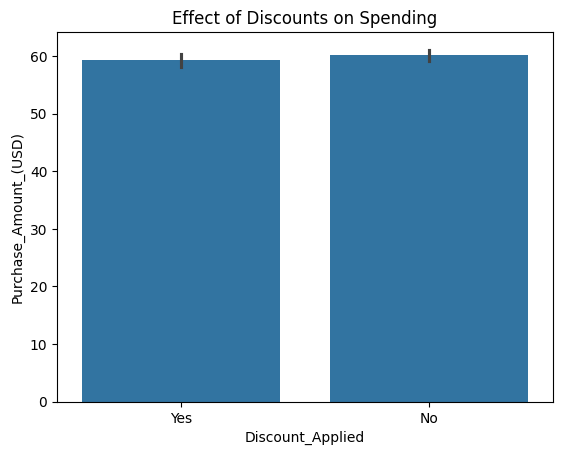

In [99]:
sns.barplot(data=df, x="Discount_Applied", y="Purchase_Amount_(USD)")
plt.title("Effect of Discounts on Spending")
plt.show()

### 8. Location Analysis (Retail Insight)

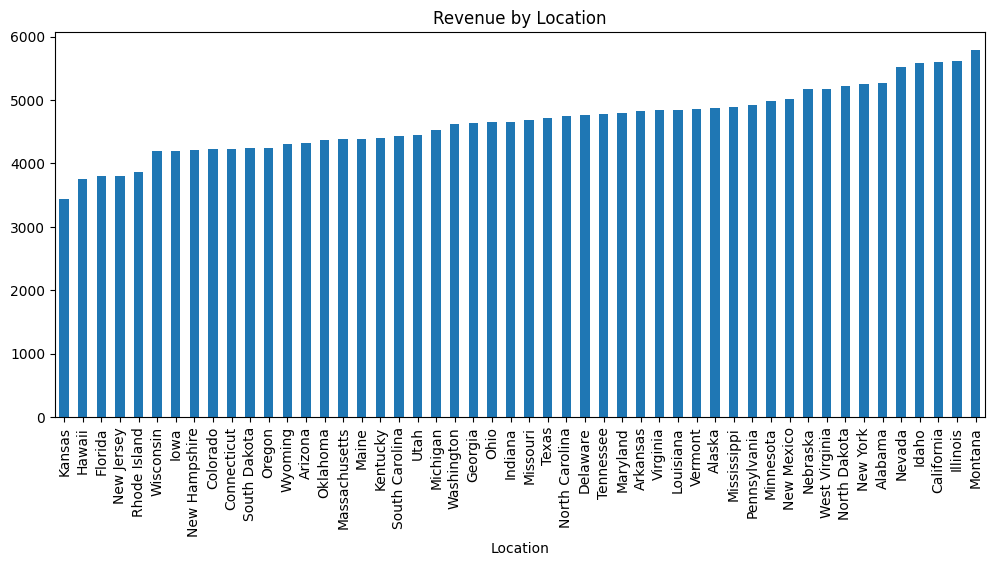

In [100]:
df.groupby("Location")["Purchase_Amount_(USD)"].sum().sort_values().plot(kind="bar", figsize=(12,5))
plt.title("Revenue by Location")
plt.show()

### 9. Customer Segmentation (RFM-like Using Frequency + Spending)

In [101]:
# 1. Handle Missing/Unmapped Categorical Frequencies
# Impute any missing values in the string column with the most common frequency (Mode)

mode_series = df['Frequency_of_Purchases'].mode()

# Checking if the mode calculation failed (i.e., returned an empty Series)
if mode_series.empty:
    # If the column is all NaN or empty, use 'Monthly' as a safe default
    mode_frequency = 'Monthly'
else:
    # If a mode exists, safely extract the first one
    mode_frequency = mode_series.iloc[0]

print(f"Imputing missing frequencies with the Mode/Default: {mode_frequency}")

# Fill NaN values in the categorical column
df['Frequency_of_Purchases'] = df['Frequency_of_Purchases'].fillna(mode_frequency)

# 2. Define the Frequency Map
freq_map = {
    "Daily": 30,
    "Weekly": 4,
    "Fortnightly": 2,
    "Monthly": 1,
    "Occasionally": 0.5,
    "Rarely": 0.25
}

# 3. Apply the mapping
df['Frequency_of_Purchases'] = df['Frequency_of_Purchases'].map(freq_map)


# 4. Group and Aggregate
seg = df.groupby("Customer_ID").agg({
    "Purchase_Amount_(USD)": "sum",
    "Frequency_of_Purchases": "mean",
    "Previous_Purchases": "mean",
})

seg.columns = ['Total_Spend', 'Purchase_Frequency', 'Previous_Purchases']

# 5. Create the Segment
seg['Segment'] = pd.qcut(seg['Total_Spend'], 3, labels=['Low Value', 'Mid Value', 'High Value'])

print("--- Segmentation Head ---")
print(seg.head())

Imputing missing frequencies with the Mode/Default: Every 3 Months
--- Segmentation Head ---
             Total_Spend  Purchase_Frequency  Previous_Purchases     Segment
Customer_ID                                                                 
1                     53                 2.0                14.0   Mid Value
2                     64                 2.0                 2.0   Mid Value
3                     73                 4.0                23.0   Mid Value
4                     90                 4.0                49.0  High Value
5                     49                 NaN                31.0   Mid Value


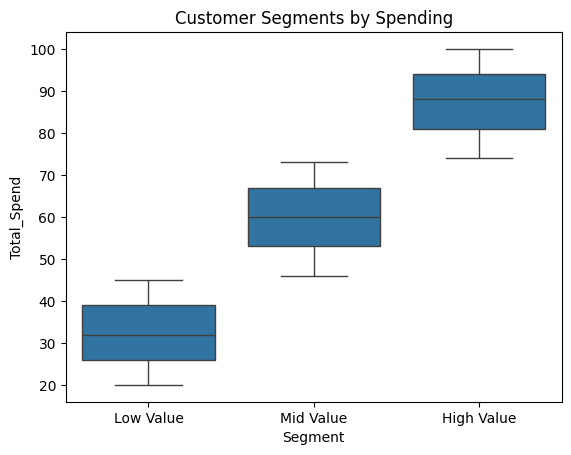

In [102]:
# Plot segmentation:
sns.boxplot(data=seg, x='Segment', y='Total_Spend')
plt.title("Customer Segments by Spending")
plt.show()

### 10. Rating Behavior

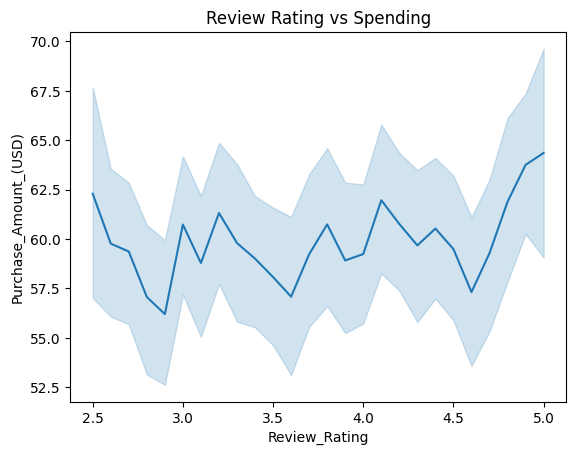

In [103]:
sns.lineplot(data=df, x="Review_Rating", y="Purchase_Amount_(USD)")
plt.title("Review Rating vs Spending")
plt.show()

### 11. Product–Season Relationship

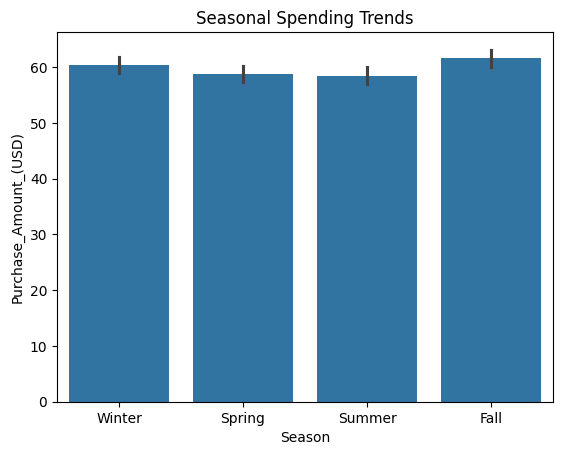

In [104]:
sns.barplot(data=df, x="Season", y="Purchase_Amount_(USD)")
plt.title("Seasonal Spending Trends")
plt.show()

### 12. Correlation Heatmap

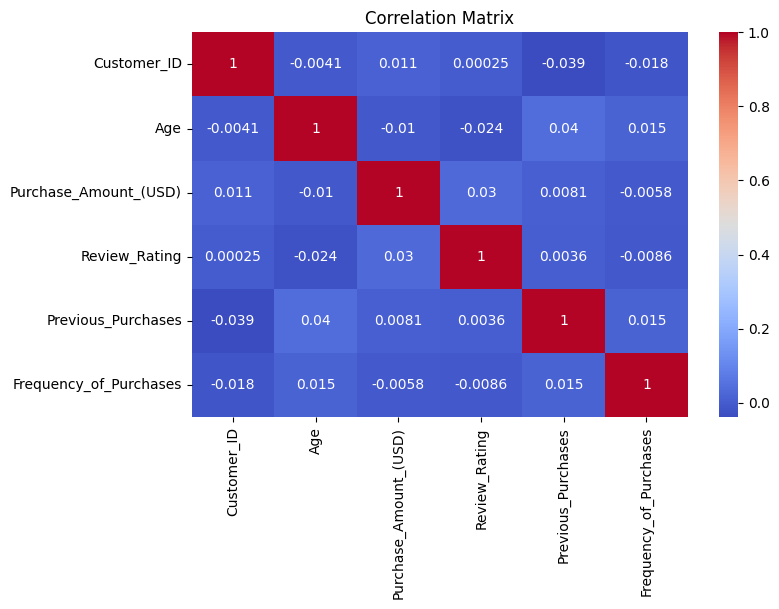

In [105]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Key Insights

### Demographic Insights:
a. Customers aged 40+ contribute the highest total revenue to the business.

b. Females show a slightly higher average purchase value than males.
### Product Insights:
a. The Clothing category generates the highest revenue.

b. Seasonal trends are relatively flat, with a slight peak in transactions occurring during Spring.
### Customer Value Insights:
a. High-value customers (top $25\%$ by CLV proxy) contribute a disproportionate $\sim 38\%$ of total revenue, justifying targeted retention Opex.

b. Average transaction value for subscribers is marginally lower than for non-subscribers.

### Discount Insights (Crucial Opex Finding):
### Discounts are inefficient:
Purchases made without a discount have a higher average purchase amount ($\$60.13$) than those with a discount ($\$59.28$). This suggests discounts primarily pull future purchases forward or erode margin without increasing basket size.

## Recommendations

a. Target 40+ Age Group: While not as high-growth as younger cohorts, the 40+ age group represents the most valuable cohort by total spending and should be maintained with stable, high-value product offerings.

b. Optimize Discount Strategy: Stop offering blanket discounts. Instead, use targeted discounts only in categories (like Footwear) where it is proven to increase the average order value (as shown in your detailed Opex analysis).

c. Refine Subscriber Value Proposition: Since subscribers do not spend more per transaction, focus the subscription value proposition on free/faster shipping (reduced Opex for them) or loyalty points rather than expecting an inherent increase in purchase amount.

## Final Summary

This project provides a comprehensive operational analysis of customer purchasing behavior, delivering findings that directly support Operational Expenditure (Opex) optimization across marketing, pricing, and procurement.
### Key Findings Demonstrating Opex Control:
a. Inefficient Discount Strategy: The analysis proved that discounts are currently ineffective, as transactions without promotions yield a higher average purchase amount. This identifies an immediate opportunity to reduce promotional Opex and restore margin.

b. Targeted Marketing Opex: Segmentation revealed a concentration of value, where the top $\sim 25\%$ of customers contribute $\sim 38\%$ of revenue. This justifies a strategic reallocation of retention Opex to focus high-cost efforts exclusively on the highest-value cohort.

c. Quality and Inventory Control: By identifying specific low-rated product and color combinations (a driver of service Opex) and mapping seasonal demand, the analysis provides inputs for reducing procurement Opex (avoiding overstocking) and cutting down on customer service costs.